<a href="https://colab.research.google.com/github/JasonIsCrackedAtFortnite/Fortnite-vs-Mental_State/blob/main/Cracked_At_Fortnite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: FortniteStatistics.csv  


In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

In [34]:
data = pd.read_csv('/content/FortniteStatistics.csv')

In [5]:
data.head()

,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,4/10,6:00 PM,27,sober,2,0,0,23%,14,2,271.08,20,20,272,331,621
1,4/10,6:00 PM,45,sober,1,2,0,30%,19,1,396.73,123,30,247,444,998
2,4/10,6:00 PM,38,high,3,0,0,30%,32,1,607.80,71,60,176,322,1109
3,4/10,7:00 PM,30,high,1,3,0,18%,19,1,714.16,244,10,238,330,4726
4,4/10,7:00 PM,16,high,3,1,1,58%,42,18,1140.00,584,150,365,668,2070


In [6]:
n , m = data.shape

In [35]:
for i in range (n):
  if(data['Mental State'][i]=='sober'):
    data['Mental State'][i] = 1
  else:
    data['Mental State'][i] = 0


  data['Accuracy'][i] = data['Accuracy'][i][:-1]
  data['Accuracy'][i] = int(data['Accuracy'][i])

data['Accuracy'] = data['Accuracy'].astype(int)
data['Mental State'] = data['Mental State'].astype(int)

<ipython-input-35-72f394fe6de2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mental State'][i] = 1
<ipython-input-35-72f394fe6de2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Accuracy'][i] = data['Accuracy'][i][:-1]
<ipython-input-35-72f394fe6de2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Accuracy'][i] = int(data['Accuracy'][i])
<ipython-input-35-72f394fe6de2>:5: SettingWithCopyWarning: 
A value is try

In [36]:
data.head()

,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,4/10,6:00 PM,27,1,2,0,0,23,14,2,271.08,20,20,272,331,621
1,4/10,6:00 PM,45,1,1,2,0,30,19,1,396.73,123,30,247,444,998
2,4/10,6:00 PM,38,0,3,0,0,30,32,1,607.80,71,60,176,322,1109
3,4/10,7:00 PM,30,0,1,3,0,18,19,1,714.16,244,10,238,330,4726
4,4/10,7:00 PM,16,0,3,1,1,58,42,18,1140.00,584,150,365,668,2070


In [37]:
data.drop(['Date', 'Time of Day'], axis = 1, inplace = True)

In [38]:
data.head()

,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,27,1,2,0,0,23,14,2,271.08,20,20,272,331,621
1,45,1,1,2,0,30,19,1,396.73,123,30,247,444,998
2,38,0,3,0,0,30,32,1,607.80,71,60,176,322,1109
3,30,0,1,3,0,18,19,1,714.16,244,10,238,330,4726
4,16,0,3,1,1,58,42,18,1140.00,584,150,365,668,2070


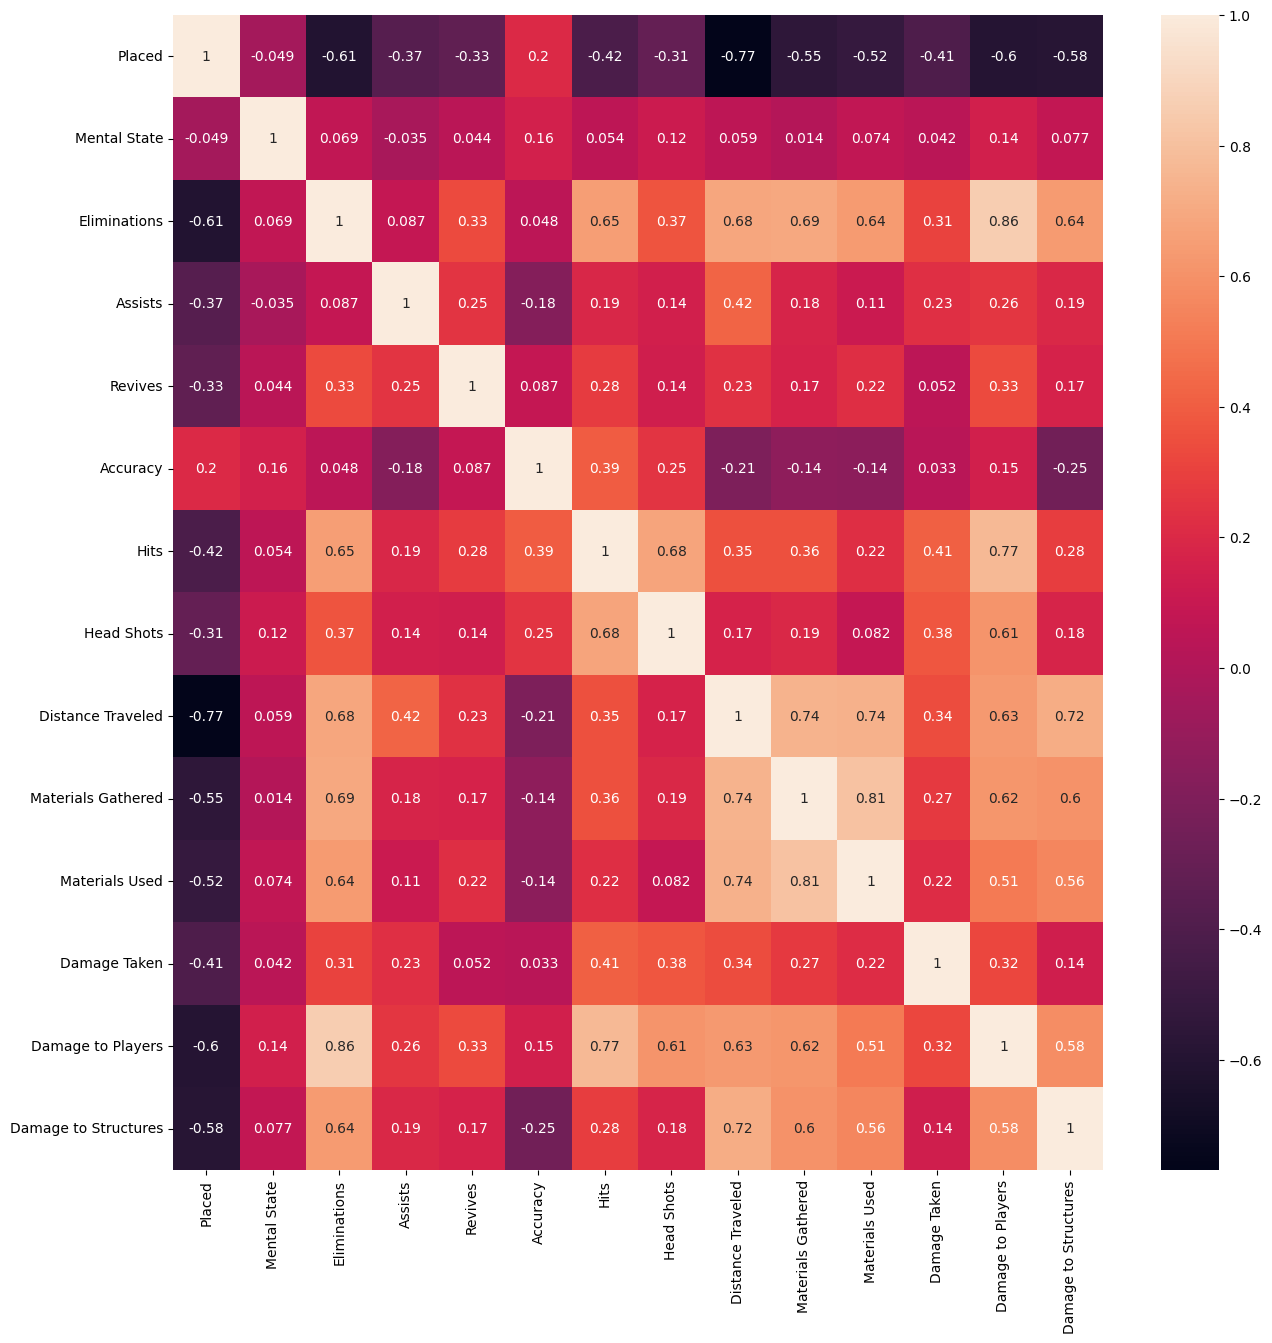

In [39]:
plt.subplots(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
y = data['Mental State']
data.drop('Mental State', axis = 1, inplace = True)
X = data

In [52]:
xtrain, xtest, ytrain, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [53]:
model = LogisticRegression()

In [54]:
model.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
logp=model.predict(xtest)


              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.50      0.67         6

    accuracy                           0.62         8
   macro avg       0.70      0.75      0.62         8
weighted avg       0.85      0.62      0.64         8

 ROC-AUC Score: 0.75
 Accuracy Score: 0.625
 Recall Score: 0.5
 Precision Score: 1.0
 F1-score: 0.6667


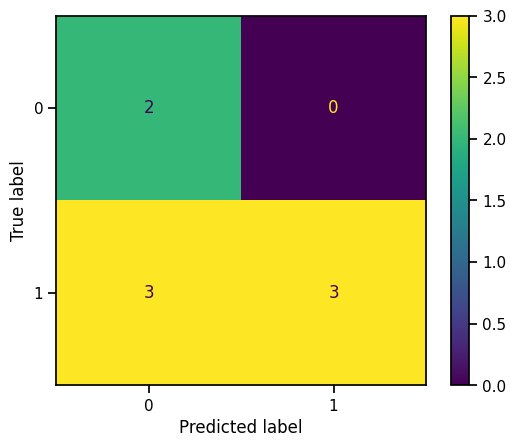

In [57]:
print(classification_report(y_test, logp))
lr_cm = confusion_matrix(y_test, logp)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = lr_cm, display_labels = model.classes_).plot()

roc_auc = round(roc_auc_score(y_test, logp), 4)
accuracy = round(accuracy_score(y_test, logp), 4)
recall = round(recall_score(y_test, logp), 4)
precision = round(precision_score(y_test, logp), 4)
f_one = round(f1_score(y_test, logp), 4)

print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")